In [1]:
import paddle
import numpy as np
from paddle.vision.transforms import Normalize

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)


In [2]:
# 模型组网并初始化网络

#初始化一个最后一个全连接层维度为10的卷积神经网络
lenet = paddle.vision.models.LeNet(num_classes=10)
model = paddle.Model(lenet)

In [3]:
# 模型训练的配置准备，准备损失函数，优化器和评价指标
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()), 
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

In [5]:
# 模型训练
model.fit(train_dataset, epochs=5, batch_size=64, verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step 938/938 [==============================] - loss: 0.0329 - acc: 0.9395 - 26ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0173 - acc: 0.9775 - 26ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0945 - acc: 0.9816 - 26ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0057 - acc: 0.9851 - 25ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.0048 - acc: 0.9868 - 27ms/step          


In [6]:
# 模型评估
model.evaluate(test_dataset, batch_size=64, verbose=1)

Eval begin...
step 157/157 [==============================] - loss: 0.0018 - acc: 0.9826 - 12ms/step            
Eval samples: 10000


{'loss': [0.0017545733], 'acc': 0.9826}

In [7]:

# 保存模型
model.save('./output/mnist')

In [6]:
# 加载模型
model.load('output/mnist')

true label: 4, pred label: 4


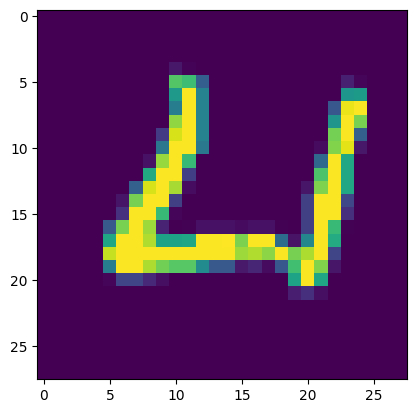

W1102 13:31:19.050410   542 sampler.cpp:139] bvar is busy at sampling for 2 seconds!
W1102 13:31:26.480041   542 sampler.cpp:139] bvar is busy at sampling for 2 seconds!
W1102 13:31:32.487461   542 sampler.cpp:139] bvar is busy at sampling for 2 seconds!
W1102 13:31:54.475307   542 sampler.cpp:139] bvar is busy at sampling for 2 seconds!
W1102 13:32:05.149533   542 sampler.cpp:139] bvar is busy at sampling for 2 seconds!
W1102 13:32:17.442417   542 sampler.cpp:139] bvar is busy at sampling for 2 seconds!
W1102 13:32:45.630517   542 sampler.cpp:139] bvar is busy at sampling for 2 seconds!


In [10]:
# 从测试集中取出一张图片
img, label = test_dataset[33]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])